In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
import healpy as hp
import warnings

import cartopy
from ulmo.analysis.spatial_plots import evals_to_healpix, evals_to_healpix_stat, show_med_LL

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# this should be run in JupyterHub

In [2]:
analysis_table = pandas.read_parquet('/home/jovyan/SST_L3S_VIIRS_2012.parquet')

In [3]:
eval_tbl = analysis_table
nside = 64

In [4]:
hpma, hp_lons, hp_lats, hp_values = evals_to_healpix_stat(eval_tbl, nside, stat = 'median') # read table, evaulate log likelihood

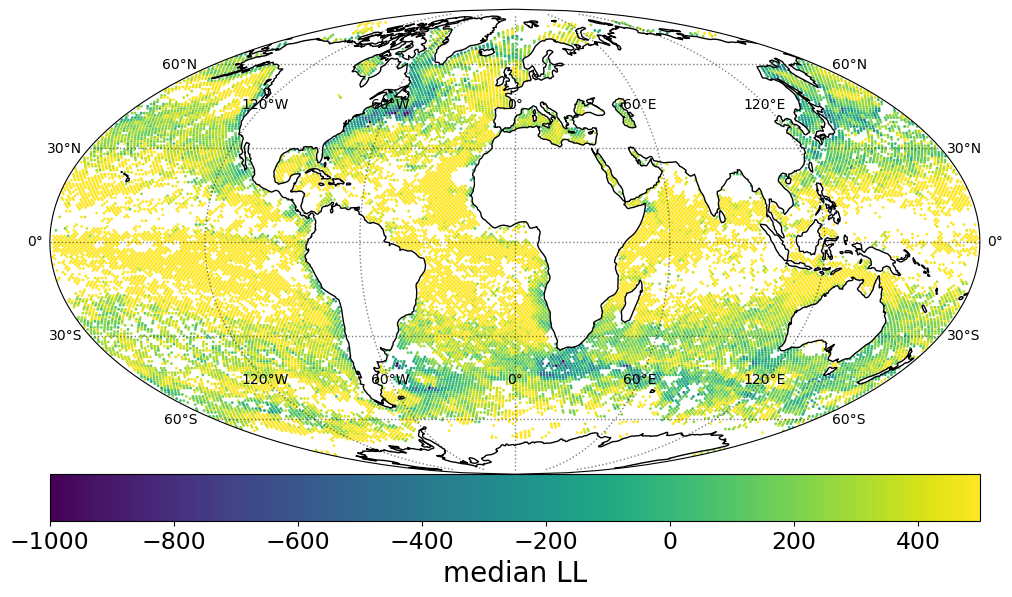

In [5]:
fig = plt.figure(figsize=(12,8)) # makes plot
color='viridis'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_values[good], vmin = -1000, vmax = 500, 
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'median LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.show()

In [6]:
# make differences in LL plot

hpma, hp_lons, hp_lats, hp_values_L2 = evals_to_healpix_stat(eval_tbl, nside, stat = 'median', metric = 'VIIRS_LL')
hpma, hp_lons, hp_lats, hp_values_L3S = evals_to_healpix_stat(eval_tbl, nside, stat = 'median', metric = 'LL')

hp_diff = hp_values_L2 - hp_values_L3S

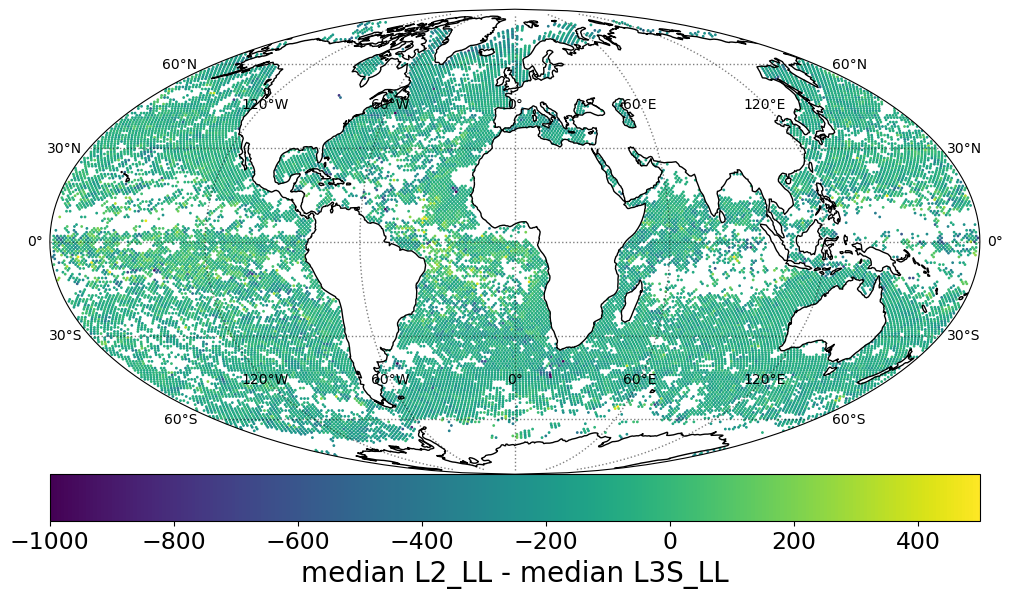

In [7]:
fig = plt.figure(figsize=(12,8)) # makes plot
color='viridis'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good], vmin = -1000, vmax = 500, 
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'median L2_LL - median L3S_LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.show()

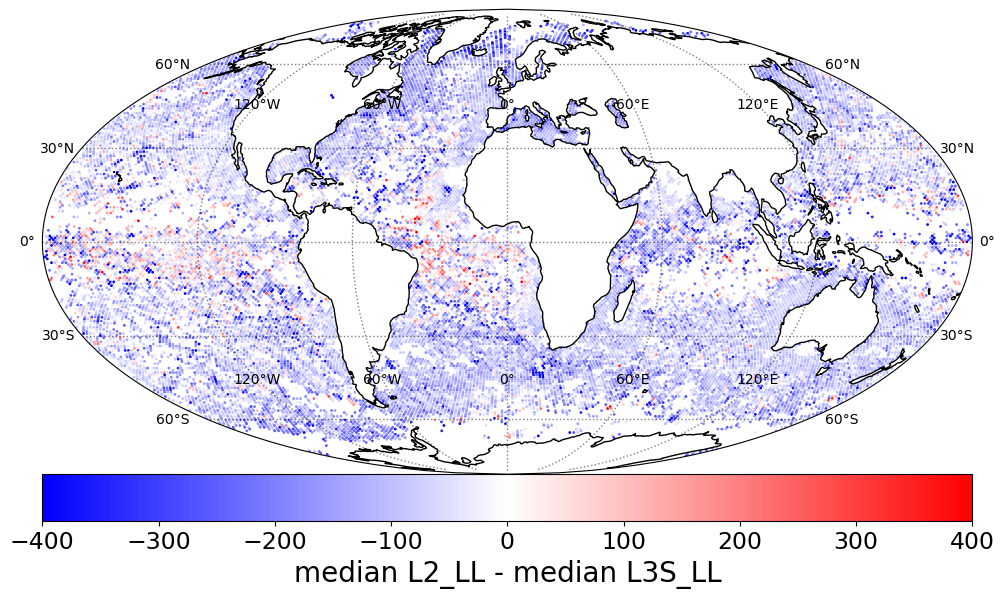

In [10]:
fig = plt.figure(figsize=(12,8)) # makes plot
color='bwr'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_diff[good], vmin = -400, vmax = 400, 
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'median L2_LL - median L3S_LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}

plt.show()

In [ ]:
# get h5 file and scatterplot

hdf5_file_path = '/home/jovyan/L3S_VIIRS144_2012_preproc.h5.h5'

with h5py.File(hdf5_file_path, 'r') as h5_file:
    valid = h5_file['valid'][:]